In [158]:
#import all packages and create global variables
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import math
from dataclasses import dataclass

@dataclass        
class centroid:
    x: float
    y: float
    counter: int = 0
    score_x: float = 0
    score_y: float = 0
    #for evaluate_scor()
    old_x: float = 0
    old_y: float = 0
        
a = centroid(random.uniform(0,10), random.uniform(0, 10))
b = centroid(random.uniform(0,10), random.uniform(0, 10))
c = centroid(random.uniform(0,10), random.uniform(0, 10))

cluster_guess=3 

#create 2D array
# 6 dimension because: x-value, y-value, the closest centroid, distance to centroids, ....
array = np.zeros((300,6))



In [159]:
#load data
#in this example: 3 imaginary clusters

       
a = centroid(random.uniform(0,10), random.uniform(0, 10))
b = centroid(random.uniform(0,10), random.uniform(0, 10))
c = centroid(random.uniform(0,10), random.uniform(0, 10))



#create 3 clusters of randomly distributed points

#create emty arrays of right size
cluster_x = np.zeros((300,1))
cluster_1_x =  np.zeros((100, 1))
cluster_2_x =  np.zeros((100, 1))
cluster_3_x =  np.zeros((100, 1))

cluster_y = np.zeros((300,1))
cluster_1_y =  np.zeros((100, 1))
cluster_2_y =  np.zeros((100, 1))
cluster_3_y =  np.zeros((100, 1))

#fill array with randomly chosen x-/ y-values
#points are choosen around perfekt centroid:
# 1: 2, 2
# 2: 8, 2
# 3: 2, 8
for x in range(100):
    cluster_1_x[x] = random.uniform(1, 3)
    
for x in range(100):
    cluster_2_x[x] = random.uniform(7, 9)
    
for x in range(100):
    cluster_3_x[x] = random.uniform(1, 3)
    
for x in range(100):
    cluster_1_y[x] = random.uniform(1, 3)
    
for x in range(100):
    cluster_2_y[x] = random.uniform(1, 3)
    
for x in range(100):
    cluster_3_y[x] = random.uniform(7, 9)

    
#concentrate cluster_1/ 2/ 3 into one array for x and y each
cluster_x = np.concatenate((cluster_1_x, cluster_2_x), axis=0)
cluster_x = np.concatenate((cluster_x, cluster_3_x), axis=0)

cluster_y = np.concatenate((cluster_1_y, cluster_2_y), axis=0)
cluster_y = np.concatenate((cluster_y, cluster_3_y), axis=0)


#create 2D array
# 6 dimension because: x-value, y-value, the closest centroid, distance to centroids, ....
array = np.zeros((300,6))

#counter to go through x and y array
x_counter=0
y_counter=0

#load 2D array with dara
for counter_load, row in enumerate(array):
    row[0]=cluster_x[x_counter]
    row[1]=cluster_y[y_counter]
    x_counter+=1
    y_counter+=1
    

In [160]:
#function which prints all points in their colour corresbonding to their closest centroid
#in first run through every point is printed in black
def plot_array():
    
    #label plot
    plt.xlabel('xlabel')
    plt.ylabel('ylabel')

    #draw points
    for counter, value in enumerate(array):
        if value[2] == 0:
            plt.plot(value[0],value[1], 'ko', markersize=3)
            
        elif value[2] == 1:
            plt.plot(value[0],value[1], 'bo', markersize=3)
            
        elif value[2] == 2:
            plt.plot(value[0],value[1], 'go', markersize=3)
            
        if value[2] == 3:
            plt.plot(value[0],value[1], 'ro', markersize=3)
            
    plt.plot(a.x, a.y, 'bx', markersize=5, markerfacecolor = 'k', markeredgewidth=1.5)
    plt.plot(b.x, b.y, 'gx', markersize=5, markerfacecolor = 'k', markeredgewidth=1.5)
    plt.plot(c.x, c.y, 'rx', markersize=5, markerfacecolor = 'k', markeredgewidth=1.5)
       
    

In [161]:
#measures distance between a x-/ y-value and centroid and returns distance
def distance_to_point(x, y, centroid):
    del_x = x-centroid.x 
    del_y = y-centroid.y
    del_x = -del_x if del_x<0 else del_x
    del_y = -del_y if del_y<0 else del_y
    distance = math.sqrt(del_x**2 + del_y**2)
    return distance

#measures distance between a x-/ y-value and centroid and returns distance
def measure_distance():
    
    for counter_array, value in enumerate(array):
        distance_a = distance_to_point(value[0], value[1], a)
        array[counter_array, 3] = distance_a
        
    for counter_array, value in enumerate(array):
        distance_b = distance_to_point(value[0], value[1], b)
        array[counter_array, 4] = distance_b
        
    for counter_array, value in enumerate(array):
        distance_c = distance_to_point(value[0], value[1], c)
        array[counter_array, 5] = distance_c

    

In [162]:
#measure closest centroid and assigns to array
#closest centroid a=1, b=2, c=3
def closest_centroid():
    for counter_array, value in enumerate(array):
        distance_a = value[3]
        distance_b = value[4]
        distance_c = value[5]
    
        if distance_a < distance_b and distance_a < distance_c:
            value[2] = 1
            
        elif distance_b < distance_a and distance_b < distance_c:
            value[2] = 2
            
        elif distance_c < distance_b and distance_c < distance_a:
            value[2] = 3
        
        else:
            print("Error: two identical distances at ponit:  " + str(counter_array +1))
        

In [163]:
#für die centroiden werden die x und y koordinaten der zugehörigen punkte addiert und durch die Anzahl der zugeordneten Punkte geteilt
def reassign_centroid():
    
    #goes through the array and adds for each centroid the x-/ y-values and a counter to keep track of the number of inputs
    for counter_array, value in enumerate(array):
       
        if value[2] == 1:
            a.counter += 1
            a.score_x += value[0]
            a.score_y += value[1]
            
        elif value[2] == 2:
            b.counter += 1
            b.score_x += value[0]
            b.score_y += value[1]
            
        elif value[2] == 3:
            c.counter += 1
            c.score_x += value[0]
            c.score_y += value[1]
    
    #note old points for evaluate_score()
    a.old_x = a.x
    a.old_y = a.y
    b.old_x = b.x
    b.old_y = b.y
    c.old_x = c.x
    c.old_y = c.y
    
    #if there are points assigned to each centroid
    #the centroids are reassigned
    if a.score_x != 0 and a.counter !=0:
        a.x = a.score_x / a.counter
        a.y = a.score_y / a.counter
    if b.score_x != 0 and b.counter !=0:
        b.x = b.score_x / b.counter
        b.y = b.score_y / b.counter
    if c.score_x != 0 and c.counter !=0:
        c.x = c.score_x / c.counter
        c.y = c.score_y / c.counter
    
   
    #resets values for the next reassign_centroid() / kmean runthrough
    a.counter = 0
    a.score_x = 0
    a.score_y = 0
    b.counter = 0
    b.score_x = 0
    b.score_y = 0
    c.counter = 0
    c.score_x = 0
    c.score_y = 0

In [164]:
#evaluate distance change of centroids
#by comparing centroids coordinates before and after reassign_centroids()
def evaluate_score():
    
    #simliar to distance_to_point() but for each centroid
    distance_a_x = a.old_x - a.x
    distance_a_y = a.old_y - a.y
    distance_b_x = b.old_x - b.x
    distance_b_y = b.old_y - b.y
    distance_c_x = c.old_x - c.x
    distance_c_y = c.old_y - c.y
    
    distance_a_x = -distance_a_x if distance_a_x<0 else distance_a_x
    distance_a_y = -distance_a_y if distance_a_y<0 else distance_a_y
    distance_a = math.sqrt(distance_a_x**2 + distance_a_x**2)
    
    distance_b_x = -distance_b_x if distance_b_x<0 else distance_b_x
    distance_b_y = -distance_b_y if distance_b_y<0 else distance_b_y
    distance_b = math.sqrt(distance_b_x**2 + distance_b_y**2)
    
    distance_c_x = -distance_c_x if distance_c_x<0 else distance_c_x
    distance_c_y = -distance_c_y if distance_c_y<0 else distance_c_y
    distance_c = math.sqrt(distance_c_x**2 + distance_c_y**2)
    
    #for less than 0.05% change of all centroids it stops the program
    min_value = 0.0005
    if distance_a < min_value and distance_b < min_value and distance_c < min_value:
        return 1
    else: 
        return 0
    

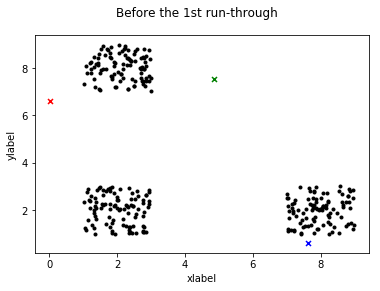

[[2.94137797 2.24595958 0.         0.         0.         0.        ]
 [2.44227735 1.04649964 0.         0.         0.         0.        ]
 [1.50178508 2.98427771 0.         0.         0.         0.        ]
 ...
 [1.89747661 8.25586049 0.         0.         0.         0.        ]
 [1.10468563 7.80542    0.         0.         0.         0.        ]
 [2.70505677 7.98316427 0.         0.         0.         0.        ]]

centroid(x=7.623788547832957, y=0.6147606765123192, counter=0, score_x=0, score_y=0, old_x=0, old_y=0)
centroid(x=4.853725063899451, y=7.548142444185268, counter=0, score_x=0, score_y=0, old_x=0, old_y=0)
centroid(x=0.011543179625297384, y=6.616240866743532, counter=0, score_x=0, score_y=0, old_x=0, old_y=0)


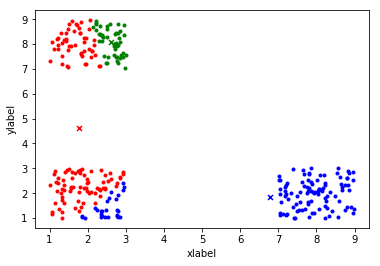

[[2.94137797 2.24595958 1.         4.95840485 5.6365073  5.26149127]
 [2.44227735 1.04649964 1.         5.19946698 6.93443864 6.07704583]
 [1.50178508 2.98427771 3.         6.56456681 5.66254033 3.92580913]
 ...
 [1.89747661 8.25586049 3.         9.5486677  3.0397812  2.49901929]
 [1.10468563 7.80542    3.         9.70588916 3.75785689 1.61527318]
 [2.70505677 7.98316427 2.         8.85930549 2.19226354 3.02051239]]

centroid(x=6.794242876017768, y=1.8641295775291908, counter=0, score_x=0, score_y=0, old_x=7.623788547832957, old_y=0.6147606765123192)
centroid(x=2.6170944597166352, y=8.089245358745515, counter=0, score_x=0, score_y=0, old_x=4.853725063899451, old_y=7.548142444185268)
centroid(x=1.7722160588179612, y=4.615257063751073, counter=0, score_x=0, score_y=0, old_x=0.011543179625297384, old_y=6.616240866743532)


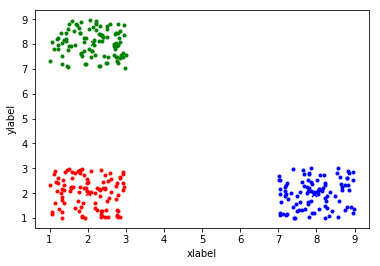

[[2.94137797 2.24595958 3.         3.8717389  5.8522772  2.64206551]
 [2.44227735 1.04649964 3.         4.42810599 7.04491507 3.63111714]
 [1.50178508 2.98427771 3.         5.40969882 5.2253813  1.65324728]
 ...
 [1.89747661 8.25586049 2.         8.05186587 0.73865449 3.64275768]
 [1.10468563 7.80542    2.         8.22617733 1.53881035 3.25925397]
 [2.70505677 7.98316427 2.         7.3596215  0.13780626 3.49470897]]

centroid(x=7.947051236318852, y=1.986765808159567, counter=0, score_x=0, score_y=0, old_x=6.794242876017768, old_y=1.8641295775291908)
centroid(x=2.139466873666707, y=8.041867620388455, counter=0, score_x=0, score_y=0, old_x=2.6170944597166352, old_y=8.089245358745515)
centroid(x=2.0220945407524287, y=2.0254601197506794, counter=0, score_x=0, score_y=0, old_x=1.7722160588179612, old_y=4.615257063751073)
Programm stops after 2 runthroughs


In [165]:
plt.figure()
plt.suptitle('Before the 1st run-through')
plot_array()
plt.show()
counter_runs = 0
runner = 1

print(array)
print()
print(a)
print(b)
print(c)

while runner:
    for i in range(1, 10):
        measure_distance()
        closest_centroid()
        reassign_centroid()
        if evaluate_score():
            runner=0
            break
        else:
            plot_array()
            plt.show()
            counter_runs += 1
        
            print(array)
            print()
            print(a)
            print(b)
            print(c)

print("Programm stops after " + str(counter_runs) + " runthroughs")
